# Solving the Schrödinger equation on a computer

The Schrödinger equation governs the behaviour of physical system on scales where quantum mechanical effects become important.
This is a differential equation which belongs to the category of partial differential equations called wave equations. $$\Large{\dot \imath\hslash = \hat H\psi}$$

In [1]:
%pylab inline
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


Next we generate the lattice for the simulation. For now we consider 200 lattice points.

In [2]:
# defining our own kronecker delta and hamiltonian as vectorized functions

psi = vectorize(lambda x,p: (1/pow(np.pi*(length**2),0.25))*np.exp(-((x-peak)**2)/(2.0*length**2) - 1j*p*x))
kronecker = vectorize(lambda i,j: 1 if i == j else 0)
h= vectorize(lambda i,j: (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2)

In [3]:
delta = .1 # The spacing between neighboring lattice points
L = 20. # The ends of the lattice
length = 1. # spread of the Gaussian wavefunction
peak = 0. # Centre of gaussian
N = int(L/delta) # half the points of the lattice
momentum = 2. # initial momentum of the wavepacket
rows,cols = reshape(arange(-N,N+1),(2*N+1,1)),reshape(arange(-N,N+1),(1,2*N+1)) 
lattice = linspace(-L,L,2*N+1) #The lattice points


In [4]:
hamiltonian = h(rows,cols)


Now that we've computed the hamiltonian matrix, let's diagonalize it

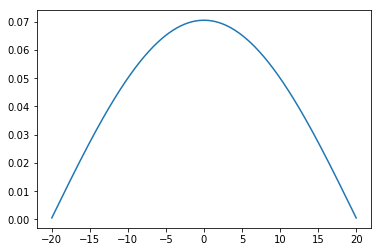

In [5]:
eigenvalues, eigenvectors = linalg.eigh(hamiltonian)
index = eigenvalues.argsort()
eigenvalues = eigenvalues[index]
eigenvectors = eigenvectors[index]
plot(lattice,absolute(eigenvectors[0]))

Let's define the initial state of our system and normalize it now.


1.0


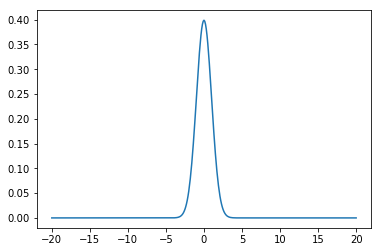

In [6]:
wavefunction = psi(lattice,momentum)
wavefunction /= sum(absolute(wavefunction))*delta
print(sum(absolute(wavefunction))*delta)
plot(lattice,absolute(wavefunction))


Now that we know the wavefunction as a linear combination of basis vectors, the time evolution of the complete wavefuction is just the linear combination of the time evolutions of the basis states. Lets do this for 10 time steps.

In [7]:
def Psi(t):
    sum = zeros(2*N+1, 'complex')
    for n in range(2*N+1):
        c = vdot(wavefunction,eigenvectors[:,n]) # nth expansion coefficient 
        E = eigenvalues[n]
        sum += c * np.exp(-E*t*1.0j) * eigenvectors[:,n]
    return sum

def Prob(t):
    return array( [absolute(Psi(t)[i])**2 for i in range(2*N+1)] )

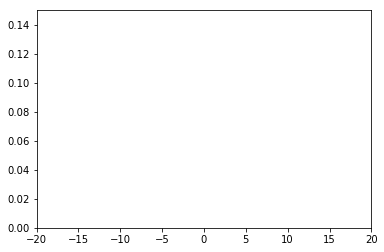

In [17]:
fig = plt.figure()
ax = plt.axes(xlim=(-L, L), ylim=(0, 0.15))
line, = ax.plot([], [], lw=2)
def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(lattice,absolute(Psi(0.05*i)**2))
    return line,



In [18]:

from matplotlib import animation
anim = animation.FuncAnimation(fig,animate,init_func=init,frames=40,interval=100,blit=True)
HTML(anim.to_html5_video())